# FLIGHT PRICE PREDICTION


#### `Aim of this project is to build a price prediction model and find out the flight prices of each Airline for a particular journey. `

# Table of Content

1. **[Metadata](#Metadata)**
2. **[Data Understanding](#data_und)**
3. **[Train Data Cleaning](#train_data)**
4. **[Processing columns](#train_process)**
5. **[Test Data Cleaning](#test_data)**
6. **[Outlier Removal](#outlier)**
7. **[Feature Engineering](#FeaEng)**
8. **[Train Test Split](#traintest)**
9. **[Assumptions](#assumptions)**
10. **[Model Building](#model)**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
import statsmodels.api as sma
import statsmodels.stats.api as ssa
import statsmodels.formula.api as sfa
import statsmodels.stats.anova as smodels
from scipy.stats import probplot
from sklearn.linear_model  import LinearRegression
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Model Building
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

<a id="Metadata"> </a>
# **Metadata**

In [3]:
meta_dict={"Airline"        : "The name of the airline",
           "Date_of_Journey": "The date of the journey",
           "Source"         : "The source from which the service begins.",
           "Destination"    : "The destination where the service ends.",
           "Route"          : "The route taken by the flight to reach the destination.",
           "Dep_Time"       : "The time when the journey starts from the source.",
           "Arrival_Time"   : "Time of arrival at the destination.",
           "Duration"       : "Total duration of the flight.",
           "Total_Stops"    : "Total stops between the source and destination.",
           "Additional_Info": "Additional information about the flight Price"
          }

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
metadata = pd.DataFrame(meta_dict.values(), index= meta_dict.keys(),columns=['Column Description']) 
metadata.style.set_properties(**{'text-align': 'right'})

,Column Description
Airline,The name of the airline
Date_of_Journey,The date of the journey
Source,The source from which the service begins.
Destination,The destination where the service ends.
Route,The route taken by the flight to reach the destination.
Dep_Time,The time when the journey starts from the source.
Arrival_Time,Time of arrival at the destination.
Duration,Total duration of the flight.
Total_Stops,Total stops between the source and destination.
Additional_Info,Additional information about the flight Price


<a id="data_und"> </a>
# **Data Understanding**

**Read the Train and Test Data**

In [6]:
train = pd.read_csv("Data_Train.csv")
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
#train = train.iloc[1: , :]

In [8]:
test = pd.read_csv("Data_Test.csv")
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
train.shape , test.shape

((10683, 11), (2671, 10))

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [13]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL ? BOM ? COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [14]:
#Categorical Columns
train.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [15]:
#Fetching Values greater than the mean to understand outliers in Target Variable
target_outliers = train[(train['Price']>train['Price'].mean())][['Airline','Source','Destination','Price','Date_of_Journey']].sort_values(by='Price', ascending=False)
target_outliers.head(8)

,Airline,Source,Destination,Price,Date_of_Journey
2924,Jet Airways Business,Banglore,New Delhi,79512,01/03/2019
5372,Jet Airways Business,Banglore,New Delhi,62427,01/03/2019
10364,Jet Airways Business,Banglore,New Delhi,57209,01/03/2019
5439,Jet Airways,Banglore,New Delhi,54826,01/03/2019
2618,Jet Airways,Banglore,New Delhi,54826,18/03/2019
1478,Jet Airways,Banglore,New Delhi,54826,18/03/2019
9715,Jet Airways Business,Delhi,Cochin,52285,6/03/2019
657,Jet Airways Business,Banglore,New Delhi,52229,01/03/2019


### DATA UNDERSTANDING INFERENCES:

*	The given train data set contains around 10863 rows and 11 columns.
*	Target variable is seem to be non-uniform, and mean and max values have a huge difference indicating towards outliers, this can be sort using transformation techniques.
*	Jet Airways has the maximum number of flights and busiest source is Delhi.
*	Most of the flights have only one stopage.
*	Also, it is observed that as the number of stops increase the price of the flight also increases.


---

<a id="train_data"> </a>
# Train Data Cleaning

**Checking For Null Values and Missing Values**

In [16]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [17]:
test.isnull().sum()  # there is no null record in test data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

**Missing Values**

In [18]:
#Single record has both Route and Total_Stops data missing
train[train['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


**Dropping null value since it is less than 0.1 % thus it is safe to drop the null value record .**

<AxesSubplot:>

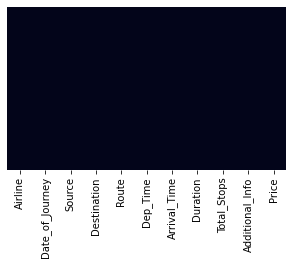

In [19]:
plt.figure(figsize = (5,3))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [20]:
train.dropna(axis=0,how='any', inplace=True)

**Checking for duplicate values**

In [21]:
train[train.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL ? NAG ? BOM ? COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL ? HYD ? BOM ? COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


**Removing duplicate records from the dataset**

In [22]:
train.drop_duplicates(keep='first', inplace = True)
#Difference in Shape
train.shape

(10462, 11)

In [23]:
#Checking Null values in Cleaned Data
train.isnull().sum().any()

False

<a id="train_process"> </a>
# Processing columns

In [24]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

**Duration Column**

In [25]:
train['Duration']=train['Duration'].str.replace('h','*1').str.replace(" ","+").str.replace('m','/60').apply(eval)

**Total_Stops Column**

In [26]:
stops_dict = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [27]:
train['Total_Stops']=train['Total_Stops'].map(stops_dict)

**Extracting Month from the Date**

In [28]:
train["Date"] = train['Date_of_Journey'].str.split('/').str[0].astype(int)
train["Month"] = train['Date_of_Journey'].str.split('/').str[1].astype('object')
train["Month"].unique()

array(['03', '05', '06', '04'], dtype=object)

**Converting Date_of_Journey into DateTime from object**

In [29]:
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y')
train['Date_of_Journey'].head()

0   2019-03-24
1   2019-05-01
2   2019-06-09
3   2019-05-12
4   2019-03-01
Name: Date_of_Journey, dtype: datetime64[ns]

**Extracting Days of Week from the Date Given**

In [30]:
train['Day'] = train['Date_of_Journey'].dt.day_name() # for integer .dayofweek / weekday

In [31]:
train['Day'].head()

0       Sunday
1    Wednesday
2       Sunday
3       Sunday
4       Friday
Name: Day, dtype: object

**Additional Info**

In [32]:
train['Additional_Info'].replace('No Info','No info',inplace=True)

In [33]:
train['Additional_Info'].value_counts(1)*100

No info                         78.235519
In-flight meal not included     18.409482
No check-in baggage included     3.039572
1 Long layover                   0.181610
Change airports                  0.066909
Business class                   0.038234
Red-eye flight                   0.009558
1 Short layover                  0.009558
2 Long layover                   0.009558
Name: Additional_Info, dtype: float64

In [34]:
# Even though Additional info is important it is not giving me sufficient info.
# lets check the significance using p value .

**Validating the significance of Additional Info using Statistical test**

In [35]:
#ho: Additional Info has no effect on Price 
#h1: Additional Info has an effect on Price

In [36]:
model= sfa.ols('Price ~ Additional_Info' , data = train).fit()
smodels.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Additional_Info,8.0,2.299041e+10,2.873801e+09,149.628846,2.083903e-239
Residual,10453.0,2.007624e+11,1.920620e+07,NaN,NaN


In [37]:
# Since P value is less than 0.05 , we reject that Additional info has no effect.

In [38]:
train['Info']=['no_info' if x == 'No info' else 'no_meal' if x=='In-flight meal not included' else 'others' for x in train['Additional_Info']]

In [39]:
train['Info'].value_counts(1)*100

no_info    78.235519
no_meal    18.409482
others      3.354999
Name: Info, dtype: float64

In [40]:
train["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'},inplace=True)

In [41]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Day,Info
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2.833333,0,No info,3897,24,03,Sunday,no_info
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7.416667,2,No info,7662,1,05,Wednesday,no_info
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19.000000,2,No info,13882,9,06,Sunday,no_info
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5.416667,1,No info,6218,12,05,Sunday,no_info
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4.750000,1,No info,13302,1,03,Friday,no_info


**Creating a copy of prepared data and dropping Columns that are non needed**

In [42]:
df_prepared=train.copy()

In [43]:
df_prepared.columns  # dropping columns that are not needed

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Day', 'Info'],
      dtype='object')

In [44]:
df_prepared.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Additional_Info','Date'] , axis=1 , inplace=True)

In [45]:
df_prepared.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Day,Info
0,IndiGo,Banglore,New Delhi,2.833333,0,3897,03,Sunday,no_info
1,Air India,Kolkata,Banglore,7.416667,2,7662,05,Wednesday,no_info
2,Jet Airways,Delhi,Cochin,19.000000,2,13882,06,Sunday,no_info
3,IndiGo,Kolkata,Banglore,5.416667,1,6218,05,Sunday,no_info
4,IndiGo,Banglore,New Delhi,4.750000,1,13302,03,Friday,no_info


In [46]:
df_prepared.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total_Stops    0
Price          0
Month          0
Day            0
Info           0
dtype: int64

<a id="outlier"> </a>
# **Outlier Removal**

**Now Removing the Outliers from the prepared Data and creating a dataframe without outliers**

In [47]:
Q1 = df_prepared.quantile(0.25)
Q3 = df_prepared.quantile(0.75)

IQR = Q3-Q1

ll = Q1-1.5*IQR
ul = Q3+1.5*IQR 

In [48]:
# analysisng outliers 
df_prepared[((df_prepared<ll) | (df_prepared>ul)).any(axis=1)].head(10)

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Day,Info
123,Air India,Delhi,Cochin,20.250000,1,27430,03,Friday,no_info
226,Jet Airways,Delhi,Cochin,37.416667,2,18799,03,Sunday,no_info
396,Multiple carriers,Delhi,Cochin,6.416667,1,36983,03,Friday,no_info
402,Air India,Delhi,Cochin,26.416667,3,10493,06,Saturday,no_info
470,Jet Airways,Delhi,Cochin,34.083333,2,13082,03,Thursday,no_info
486,Jet Airways,Banglore,New Delhi,6.333333,1,26890,03,Friday,no_info
510,Jet Airways,Banglore,New Delhi,5.416667,1,26890,03,Friday,no_info
553,Air India,Delhi,Cochin,38.250000,2,10598,03,Saturday,no_info
597,Air India,Mumbai,Hyderabad,29.583333,2,25139,03,Wednesday,no_info
628,Jet Airways,Banglore,New Delhi,6.166667,1,27210,03,Friday,no_info


In [49]:
df_wto = df_prepared[~((df_prepared<ll) | (df_prepared>ul)).any(axis=1)]
df_wto.shape, df_prepared.shape

((10264, 9), (10462, 9))

---

# Test Data Cleaning

In [50]:
test['Duration']=test['Duration'].str.replace('h','*1').str.replace(" ","+").str.replace('m','/60').apply(eval)

stops_dict = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

test['Total_Stops']=test['Total_Stops'].map(stops_dict)

test["Date"] = test['Date_of_Journey'].str.split('/').str[0].astype(int)
test["Month"] = test['Date_of_Journey'].str.split('/').str[1].astype('object')
test["Month"].unique()

test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y')
test['Date_of_Journey'].head()

test['Day'] = test['Date_of_Journey'].dt.day_name() # for integer .dayofweek / weekday

test['Day'].head()

test['Additional_Info'].replace('No Info','No info',inplace=True)

test['Additional_Info'].value_counts(1)*100

test['Info']=['no_info' if x == 'No info' else 'no_meal' if x=='In-flight meal not included' else 'others' for x in test['Additional_Info']]

test['Info'].value_counts(1)*100

test["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'},inplace=True)

test.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Additional_Info','Date'] , axis=1 , inplace=True)

test.head()

,Airline,Source,Destination,Duration,Total_Stops,Month,Day,Info
0,Jet Airways,Delhi,Cochin,10.916667,1,06,Thursday,no_info
1,IndiGo,Kolkata,Banglore,4.000000,1,05,Sunday,no_info
2,Jet Airways,Delhi,Cochin,23.750000,1,05,Tuesday,no_meal
3,Multiple carriers,Delhi,Cochin,13.000000,1,05,Tuesday,no_info
4,Air Asia,Banglore,Delhi,2.833333,0,06,Monday,no_info


# 

------

<a id="FeaEng"> </a>
# `Feature Engineering`

In [51]:
cat=df_wto.select_dtypes(exclude='number')

In [52]:
cat.columns

Index(['Airline', 'Source', 'Destination', 'Month', 'Day', 'Info'], dtype='object')

In [53]:
num=df_wto.select_dtypes(include='number')

In [54]:
num.columns

Index(['Duration', 'Total_Stops', 'Price'], dtype='object')

In [55]:
Scaled_df=df_wto.copy()

In [56]:
mm= MinMaxScaler()
Scaled_df['Duration']=mm.fit_transform(num[['Duration']])
Scaled_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Day,Info
0,IndiGo,Banglore,New Delhi,0.082707,0,3897,03,Sunday,no_info
1,Air India,Kolkata,Banglore,0.220551,2,7662,05,Wednesday,no_info
2,Jet Airways,Delhi,Cochin,0.568922,2,13882,06,Sunday,no_info
3,IndiGo,Kolkata,Banglore,0.160401,1,6218,05,Sunday,no_info
4,IndiGo,Banglore,New Delhi,0.140351,1,13302,03,Friday,no_info


In [57]:
df=pd.get_dummies(data=Scaled_df , columns = cat.columns , drop_first=True )
df.head(5)

,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Month_04,Month_05,Month_06,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Info_no_meal,Info_others
0,0.082707,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.220551,2,7662,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0.568922,2,13882,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.160401,1,6218,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.140351,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


**Log Transformation on Target Variable**

In [58]:
df_tgt=df.copy()

In [59]:
df_tgt['Price']=np.log(df_tgt['Price'])

<AxesSubplot:ylabel='Frequency'>

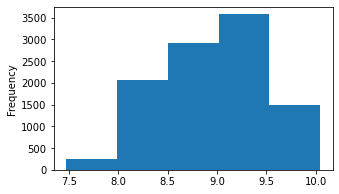

In [60]:
plt.figure(figsize=(5,3))
df_tgt['Price'].plot.hist(bins = 5)

## EDA & FEATURE ENG END HERE 

<a id="traintest"> </a>
# `Train Test Split`

* Final Data set to be used   " df_tgt "

In [61]:
X = df_tgt.drop(['Price'],axis=1)
y = df_tgt['Price']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7184, 30), (3080, 30), (7184,), (3080,))

<a id="model"> </a>
# `Model Building`

In [64]:
model = sma.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     962.5
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:43:03   Log-Likelihood:                 175.03
No. Observations:                7184   AIC:                            -296.1
Df Residuals:                    7157   BIC:                            -110.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Duration                      0.1044      0.018      5.721      0.000       0.069       0.140
Total_Stops                   0.2829      0.008     36.592      0.000       0.268       0.298
Airline_Air India             0.2509      0.018     14.116      0.000       0.216       0.286
Airline_GoAir                 0.0077      0.025      0.304      0.761      -0.042       0.058
Airline_IndiGo                0.0673      0.017      3.980      0.000       0.034       0.100
Airline_Jet Airways           0.6954      0.017     39.975      0.000       0.661       0.729
Airline_Multiple carriers     0.4526      0.018     24.505      0.000       0.416       0.489
Airline_Other                 0.4621      0.086      5.402      0.000       0.294       0.630
Airline_SpiceJet             -0.0510      0.020     -2.533      0.011      -0.090      -0.012
Airline_Vistara               0.3562      0.020     17.527      0.000       0.316       0.396
Source_Chennai                4.2413      0.012    350.530      0.000       4.218       4.265
Source_Delhi                  4.3163      0.010    411.619      0.000       4.296       4.337
Source_Kolkata                8.6094      0.020    424.118      0.000       8.570       8.649
Source_Mumbai                 4.0751      0.011    371.305      0.000       4.054       4.097
Destination_Cochin            4.3163      0.010    411.619      0.000       4.296       4.337
Destination_Delhi             8.4820      0.021    400.730      0.000       8.440       8.523
Destination_Hyderabad         4.0751      0.011    371.305      0.000       4.054       4.097
Destination_Kolkata           4.2413      0.012    350.530      0.000       4.218       4.265
Destination_New Delhi         8.6112      0.020    421.740      0.000       8.571       8.651
Month_04                     -0.2322      0.012    -18.759      0.000      -0.256      -0.208
Month_05                     -0.1102      0.009    -11.949      0.000      -0.128      -0.092
Month_06                     -0.1298      0.009    -14.540      0.000      -0.147      -0.112
Day_Monday                   -0.0758      0.012     -6.096      0.000      -0.100      -0.051
Day_Saturday                 -0.0358      0.013     -2.835      0.005      -0.061      -0.011
Day_Sunday                   -0.0005      0.013     -0.036      0.972      -0.026       0.025
Day_Thursday                 -0.1114      0.013     -8.823      0.000      -0.136      -0.087
Day_Tuesday                  -0.0480      0.014     -3.403      0.001      -0.076      -0.020
Day_Wednesday                -0.0683      0.012     -5.630      0.000      -0.092      -0.045
Info_no_meal                 -0.3232      0.009    -35.613      0.000      -0.341      -0.305
Info_others                  -0.0957      0.020     -4.824      0.000      

<a id="assumptions"> </a>
# `Assumptions`

### **1. Checking Linearity**

<AxesSubplot:>

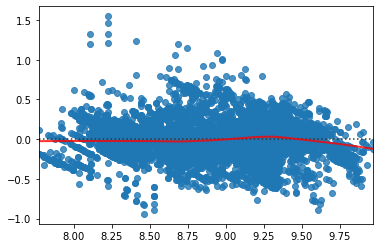

In [65]:
fitted =model.fittedvalues # predicted values
resid = model.resid        # actual - predicted

sns.residplot(fitted,resid,lowess =True, line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8}, )

**Checking Linearity Using Rainbow Test**

In [66]:
# model linearity:: Rainbow Test
# Ho: Data is Linear
# H1: Data is not Linear

np.round(sma.stats.diagnostic.linear_rainbow(model),2)

#We can infer that since pvalue>0.05, we failed to reject H0 meaning Model follows Linearity

array([1.1, 0. ])

**Checking Linearity using ProbPlot**

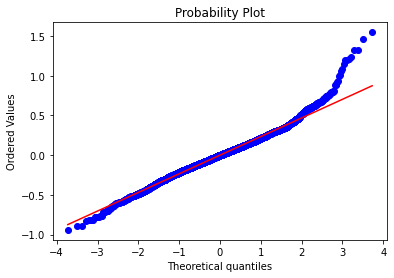

In [67]:
probplot(model.resid,plot=plt)
plt.show()

#Heavy-tailed residuals

**Conclusion: We can infer that Model follows Linearity**

### **2. Normality Tests**

In [68]:
# model Normality:: Shapiro Test
# Ho: Data is Normal
# H1: Data is not Normal

teststats, pvalue = stats.shapiro(model.resid)

print('Test Statistics:', teststats)
print('P-Value:', pvalue)

#If dataset > 5000, we must use or infer test-statistic as an indicator for checking normality
#Inference: Since our data > 5000 hence using teststats which is > 0.05, hence our data is normal.

Test Statistics: 0.9853945970535278
P-Value: 1.3892033133936457e-26


### 3. Multi-Collinearity

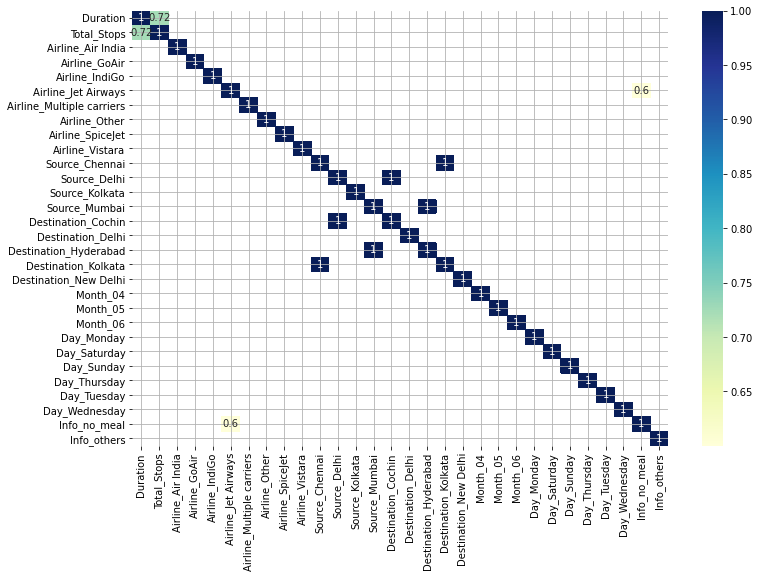

In [69]:
plt.figure(figsize = [12, 8])
sns.heatmap(X.corr()[np.abs(X.corr())>0.6], annot = True, cmap = "YlGnBu")
plt.grid()

In [70]:
vif_data = X

num_cols = vif_data.select_dtypes(include=np.number) # Predictor Variables..

mylist = [] # Store all the vif values

for i in range(vif_data.shape[1]):
    mylist.append(variance_inflation_factor(num_cols.values, i))

In [71]:
vif=pd.DataFrame({"Labels": num_cols.columns, "VIF": mylist})

In [72]:
vif.sort_values(by='VIF', ascending=False)

,Labels,VIF
17,Destination_Kolkata,inf
16,Destination_Hyderabad,inf
14,Destination_Cochin,inf
13,Source_Mumbai,inf
10,Source_Chennai,inf
11,Source_Delhi,inf
12,Source_Kolkata,15.091671
5,Airline_Jet Airways,9.087046
15,Destination_Delhi,7.191987
4,Airline_IndiGo,6.038650


In [73]:
#Inference: VIF>10 and inf suggest high correlation in independent variable.

### Heteroskedasticity

In [74]:
# Breusch Pagan Test
#H0 : Error Variances are all equal
#H1 : Error Variances are not equal

localframe = pd.DataFrame(ssa.het_breuschpagan(model.resid, model.model.exog), 
                          columns = ["value"],
            index =["Test Stats", "PValue", "F-Test Stats", "Pr(F-Test)"])

localframe[2:]
# Conclusion: Reject the Ho meaning that there is uneven variance in the model

,value
F-Test Stats,6.038983e+01
Pr(F-Test),6.116137e-284


### Auto-Correlation

In [75]:
#H0:  The sequence was produced in a random manner
#H1:  The sequence was not produced in a random manner

AC = durbin_watson(model.resid)
AC

1.9749448027936771

# Train Test Accuracy and RMSE

In [76]:
#Prediction Train
y_pred_train_ols=model.predict(X_train)

# R-Squared Train
r2_train_ols = r2_score(y_train,y_pred_train_ols)
print('r2_train_ols',r2_train_ols)

#Root mean squared error(RMSE) Train
rmse_train_ols = np.sqrt(mean_squared_error(y_train,y_pred_train_ols))
print('rmse_train_ols',rmse_train_ols)

r2_train_ols 0.7776166306570156
rmse_train_ols 0.2361467535992118


# Test Accuracy and RMSE

In [77]:
#Prediction
y_pred_ols=model.predict(X_test)

# R-Squared
r2_test_ols = r2_score(y_test,y_pred_ols)
print('r2_test_ols',r2_test_ols)

#Root mean squared error(RMSE)
rmse_test_ols = np.sqrt(mean_squared_error(y_test,y_pred_ols))
print('rmse_test_ols',rmse_test_ols)

r2_test_ols 0.7660551956975629
rmse_test_ols 0.24239685542658843


# Default Decision Tree Regressor 

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
#Initializing the regressor 
dtr = DecisionTreeRegressor()

In [80]:
dtr_model = dtr.fit(X_train, y_train)

# Train Accuracy and RMSE - - DT Model

In [81]:
#Prediction Train
y_pred_train_dt=dtr_model.predict(X_train)

# R-Squared Train
r2_train_dt = r2_score(y_train,y_pred_train_dt)
print('r2_train_dt',r2_train_dt)

#Root mean squared error(RMSE) Train
rmse_train_dt = np.sqrt(mean_squared_error(y_train,y_pred_train_dt))
print('rmse_train_dt',rmse_train_dt)

r2_train_dt 0.96182975532835
rmse_train_dt 0.09783478578955533


# Test Accuracy and RMSE - - DT Model

In [82]:
#Prediction
y_pred_dt=dtr_model.predict(X_test)

# R-Squared
r2_test_dt = r2_score(y_test,y_pred_dt)
print('r2_test_dt',r2_test_dt)

#Root mean squared error(RMSE)
rmse_test_dt = np.sqrt(mean_squared_error(y_test,y_pred_dt))
print('rmse_test_dt',rmse_test_dt)

r2_test_dt 0.7816607042316218
rmse_test_dt 0.23417268304643582


In [83]:
# train accuracy > test accuracy ,implies model is overfit , 
# using random forest model to build less complex model to reduce overfiting .

In [84]:
print(f"{np.exp(y_test.head())} : \n{np.round(np.exp(y_pred_dt[:5]),2)}")

10093     4423.0
5791      7191.0
4382     10262.0
4564     12009.0
2825      4256.0
Name: Price, dtype: float64 : 
[ 4442.19  8330.   10262.    7893.    6366.62]


-----

# Default Random Forest Regressor

In [85]:
#Initialization and Fitting
rfr=RandomForestRegressor()
rfr_model = rfr.fit(X_train, y_train)

# Train Accuracy and RMSE - - RF Model

In [86]:
#Prediction Train
y_pred_train_rfr=rfr_model.predict(X_train)

# R-Squared Train
r2_train_rfr = r2_score(y_train,y_pred_train_rfr)
print('r2_train_rfr',r2_train_rfr)

#Root mean squared error(RMSE) Train
rmse_train_rfr = np.sqrt(mean_squared_error(y_train,y_pred_train_rfr))
print('rmse_train_rfr',rmse_train_rfr)

r2_train_rfr 0.9519578187230002
rmse_train_rfr 0.10975951652538163


# Test Accuracy and RMSE - - RF Model

In [87]:
#Prediction
y_pred_rfr=rfr_model.predict(X_test)

# R-Squared
r2_test_rfr = r2_score(y_test,y_pred_rfr)
print('r2_test_rfr',r2_test_rfr)

#Root mean squared error(RMSE)
rmse_test_rfr = np.sqrt(mean_squared_error(y_test,y_pred_rfr))
print('rmse_test_rfr',rmse_test_rfr)

r2_test_rfr 0.8504720832879885
rmse_test_rfr 0.19379002583161156


In [88]:
# random forest model has reduced the overfit but
# random forest model is aslo overfit so now we are using regularization to reduce overfiting .

In [89]:
# Cross_Val_Train

In [90]:
rfr_model_cv_r2 = cross_val_score(rfr_model, X_train, y_train, scoring='r2', cv=10)
print(rfr_model_cv_r2)
scores=rfr_model_cv_r2.mean()
print('Random Forest Cross Validation Train Score ',scores)

[0.835737   0.85488057 0.83596458 0.82140032 0.86976534 0.84453935
 0.84526363 0.84830633 0.86196642 0.85949254]
Random Forest Cross Validation Train Score  0.847731608527271


In [91]:
# Cross_Val_Test

**Cross-Validation Results**

In [92]:
rfr_model_cv_r2 = cross_val_score(rfr_model, X_test, y_test, scoring='r2', cv=10)  #0.8546
print(rfr_model_cv_r2)
scores=rfr_model_cv_r2.mean()
print('Random Forest Cross Validation Test Score ',scores)

[0.8252167  0.81466963 0.85231303 0.83568157 0.84336939 0.83123515
 0.81296447 0.81335317 0.88230641 0.85475628]
Random Forest Cross Validation Test Score  0.8365865801599405


**The average test score is 0.83 and train is 0.84 .**

---

# Using regularization parameters to recreate the random forest regressor model.

In [93]:
tuned_params={'bootstrap': [True, False],
 'max_depth': [30, 40, 50, 60, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200,400]}

In [94]:
rfr_grid = GridSearchCV(estimator=rfr, param_grid=tuned_params, cv=5)

----

In [504]:
rfr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [30, 40, 50, 60, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400]})

In [506]:
rfr_grid.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 400}

In [ ]:
# Building Model Using Regularization

In [95]:
#Initialization and Fitting using best parameters
rf=RandomForestRegressor(bootstrap= True,
 max_depth= 50,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 10,
 n_estimators= 400,random_state=0)
rfr_grid_model = rf.fit(X_train, y_train)

# Train Accuracy and RMSE - - RF_Grid Model

In [96]:
#Prediction Train
y_pred_train_rfr_grid=rfr_grid_model.predict(X_train)

# R-Squared Train
r2_train_rfr_grid = r2_score(y_train,y_pred_train_rfr_grid)
print('r2_train_rfr_grid',r2_train_rfr_grid)

#Root mean squared error(RMSE) Train
rmse_train_rfr_grid = np.sqrt(mean_squared_error(y_train,y_pred_train_rfr_grid))
print('rmse_train_rfr_grid',rmse_train_rfr_grid)

r2_train_rfr_grid 0.9270028165754752
rmse_train_rfr_grid 0.13529566393976572


# Test Accuracy and RMSE - - RF_Grid Model

In [97]:
#Prediction
y_pred_rfr_grid=rfr_grid_model.predict(X_test)

# R-Squared
r2_test_rfr_grid = r2_score(y_test,y_pred_rfr_grid)
print('r2_test_rfr_grid',r2_test_rfr_grid)

#Root mean squared error(RMSE)
rmse_test_rfr_grid = np.sqrt(mean_squared_error(y_test,y_pred_rfr_grid))
print('rmse_test_rfr_grid',rmse_test_rfr_grid)

r2_test_rfr_grid 0.8692925659011074
rmse_test_rfr_grid 0.1811842422024172


In [98]:
rfr_grid_model_cv_r2 = cross_val_score(rfr_grid_model, X_train, y_train, scoring='r2', cv=10)
print(rfr_grid_model_cv_r2)
scores=rfr_grid_model_cv_r2.mean()
print('Random Forest Cross Validation Train Score ',scores)

[0.86001797 0.8734459  0.86198995 0.85241223 0.88715406 0.87641719
 0.87238752 0.85930358 0.88173679 0.87646905]
Random Forest Cross Validation Train Score  0.8701334262654559


In [99]:
# Cross_Val_Test

**Cross-Validation Results**

In [100]:
rfr_grid_model_cv_r2 = cross_val_score(rfr_grid_model, X_test, y_test, scoring='r2', cv=10)  #0.8546
print(rfr_grid_model_cv_r2)
scores=rfr_grid_model_cv_r2.mean()
print('Random Forest Cross Validation Test Score ',scores)

[0.83476023 0.82705364 0.86907573 0.84202183 0.85854649 0.83797138
 0.81564284 0.8283554  0.88118479 0.86796841]
Random Forest Cross Validation Test Score  0.8462580754379928


----

# Gradient Boosting Regressor

In [102]:
from sklearn.ensemble import GradientBoostingRegressor  

In [107]:
gbr = GradientBoostingRegressor(n_estimators=400,   #88.225
                                max_depth=5,
                                min_samples_split= 10,
                                max_features= 'auto',
                                random_state=0,learning_rate=0.1)

In [108]:
gbr_model = gbr.fit(X_train, y_train)

# Train Accuracy and RMSE - - GB Model

In [109]:
#Prediction Train
y_pred_train_gbr_grid=gbr_model.predict(X_train)

# R-Squared Train
r2_train_gbr_grid = r2_score(y_train,y_pred_train_gbr_grid)
print('r2_train_gbr_grid',r2_train_gbr_grid)

#Root mean squared error(RMSE) Train
rmse_train_gbr_grid = np.sqrt(mean_squared_error(y_train,y_pred_train_gbr_grid))
print('rmse_train_gbr_grid',rmse_train_gbr_grid)

r2_train_gbr_grid 0.9199699804437342
rmse_train_gbr_grid 0.14166327838626355


# Test Accuracy and RMSE - - GB Model

In [110]:
#Prediction
y_pred_gbr_grid=gbr_model.predict(X_test)

# R-Squared
r2_test_gbr_grid = r2_score(y_test,y_pred_gbr_grid)
print('r2_test_gbr_grid',r2_test_gbr_grid)

#Root mean squared error(RMSE)
rmse_test_gbr_grid = np.sqrt(mean_squared_error(y_test,y_pred_gbr_grid))
print('rmse_test_gbr_grid',rmse_test_gbr_grid)

r2_test_gbr_grid 0.8728564224188974
rmse_test_gbr_grid 0.17869709526446106


In [111]:
# Cross_Val_Train

In [112]:
gbr_model_cv_r2 = cross_val_score(gbr_model, X_train, y_train, scoring='r2', cv=10)
print(gbr_model_cv_r2)
scores=gbr_model_cv_r2.mean()
print(scores)

[0.86697386 0.88116715 0.86505496 0.86659854 0.89540447 0.88263176
 0.87156719 0.86888277 0.88719509 0.88427298]
0.8769748777143016


In [113]:
# Cross_Val_Test

**Cross-Validation Results**

In [114]:
gbr_model_cv_r2 = cross_val_score(gbr_model, X_test, y_test, scoring='r2', cv=10)  #0.8546
print(gbr_model_cv_r2)
scores=gbr_model_cv_r2.mean()
print(scores)

[0.82588251 0.81717407 0.8492427  0.83652504 0.85919869 0.85076216
 0.83153214 0.83594301 0.88310253 0.87402753]
0.8463390374980448


**The average test score is 0.86 and train is 0.87 .**

# Auto ML 

In [115]:
from flaml import AutoML

In [116]:
automl=AutoML()
automl_settings={"time_budget":50,"metric":"rmse","task":"regression"}
automl.fit(X_train,y_train, **automl_settings)

[flaml.automl: 10-25 16:13:14] {1432} INFO - Evaluation method: holdout
[flaml.automl: 10-25 16:13:14] {1478} INFO - Minimizing error metric: rmse
[flaml.automl: 10-25 16:13:14] {1515} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree']
[flaml.automl: 10-25 16:13:14] {1748} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-25 16:13:14] {1865} INFO - Estimated sufficient time budget=529s. Estimated necessary time budget=1s.
[flaml.automl: 10-25 16:13:14] {1938} INFO -  at 0.2s,	estimator lgbm's best error=0.3835,	best estimator lgbm's best error=0.3835
[flaml.automl: 10-25 16:13:14] {1748} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-25 16:13:14] {1938} INFO -  at 0.3s,	estimator lgbm's best error=0.3835,	best estimator lgbm's best error=0.3835
[flaml.automl: 10-25 16:13:14] {1748} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-25 16:13:14] {1938} INFO -  at 0.3s,	estimator lgbm's best error=0.2962,	best estima

[flaml.automl: 10-25 16:13:18] {1938} INFO -  at 3.8s,	estimator extra_tree's best error=0.1922,	best estimator lgbm's best error=0.1848
[flaml.automl: 10-25 16:13:18] {1748} INFO - iteration 37, current learner rf
[flaml.automl: 10-25 16:13:18] {1938} INFO -  at 3.9s,	estimator rf's best error=0.1875,	best estimator lgbm's best error=0.1848
[flaml.automl: 10-25 16:13:18] {1748} INFO - iteration 38, current learner rf
[flaml.automl: 10-25 16:13:18] {1938} INFO -  at 4.0s,	estimator rf's best error=0.1875,	best estimator lgbm's best error=0.1848
[flaml.automl: 10-25 16:13:18] {1748} INFO - iteration 39, current learner rf
[flaml.automl: 10-25 16:13:18] {1938} INFO -  at 4.2s,	estimator rf's best error=0.1875,	best estimator lgbm's best error=0.1848
[flaml.automl: 10-25 16:13:18] {1748} INFO - iteration 40, current learner rf
[flaml.automl: 10-25 16:13:18] {1938} INFO -  at 4.2s,	estimator rf's best error=0.1875,	best estimator lgbm's best error=0.1848
[flaml.automl: 10-25 16:13:18] {174

[flaml.automl: 10-25 16:13:32] {1748} INFO - iteration 75, current learner extra_tree
[flaml.automl: 10-25 16:13:32] {1938} INFO -  at 18.1s,	estimator extra_tree's best error=0.1922,	best estimator catboost's best error=0.1800
[flaml.automl: 10-25 16:13:32] {1748} INFO - iteration 76, current learner lgbm
[flaml.automl: 10-25 16:13:32] {1938} INFO -  at 18.2s,	estimator lgbm's best error=0.1751,	best estimator lgbm's best error=0.1751
[flaml.automl: 10-25 16:13:32] {1748} INFO - iteration 77, current learner lgbm
[flaml.automl: 10-25 16:13:32] {1938} INFO -  at 18.4s,	estimator lgbm's best error=0.1751,	best estimator lgbm's best error=0.1751
[flaml.automl: 10-25 16:13:32] {1748} INFO - iteration 78, current learner rf
[flaml.automl: 10-25 16:13:32] {1938} INFO -  at 18.6s,	estimator rf's best error=0.1875,	best estimator lgbm's best error=0.1751
[flaml.automl: 10-25 16:13:32] {1748} INFO - iteration 79, current learner lgbm
[flaml.automl: 10-25 16:13:33] {1938} INFO -  at 18.7s,	esti

[flaml.automl: 10-25 16:13:40] {1938} INFO -  at 26.1s,	estimator xgboost's best error=0.1795,	best estimator lgbm's best error=0.1743
[flaml.automl: 10-25 16:13:40] {1748} INFO - iteration 114, current learner extra_tree
[flaml.automl: 10-25 16:13:40] {1938} INFO -  at 26.4s,	estimator extra_tree's best error=0.1922,	best estimator lgbm's best error=0.1743
[flaml.automl: 10-25 16:13:40] {1748} INFO - iteration 115, current learner lgbm
[flaml.automl: 10-25 16:13:40] {1938} INFO -  at 26.5s,	estimator lgbm's best error=0.1743,	best estimator lgbm's best error=0.1743
[flaml.automl: 10-25 16:13:40] {1748} INFO - iteration 116, current learner lgbm
[flaml.automl: 10-25 16:13:41] {1938} INFO -  at 26.7s,	estimator lgbm's best error=0.1743,	best estimator lgbm's best error=0.1743
[flaml.automl: 10-25 16:13:41] {1748} INFO - iteration 117, current learner xgboost
[flaml.automl: 10-25 16:13:41] {1938} INFO -  at 27.2s,	estimator xgboost's best error=0.1795,	best estimator lgbm's best error=0.

[flaml.automl: 10-25 16:13:53] {1748} INFO - iteration 152, current learner xgboost
[flaml.automl: 10-25 16:13:54] {1938} INFO -  at 40.5s,	estimator xgboost's best error=0.1795,	best estimator lgbm's best error=0.1743
[flaml.automl: 10-25 16:13:54] {1748} INFO - iteration 153, current learner catboost
[flaml.automl: 10-25 16:13:56] {1938} INFO -  at 41.9s,	estimator catboost's best error=0.1800,	best estimator lgbm's best error=0.1743
[flaml.automl: 10-25 16:13:56] {1748} INFO - iteration 154, current learner lgbm
[flaml.automl: 10-25 16:13:56] {1938} INFO -  at 42.1s,	estimator lgbm's best error=0.1743,	best estimator lgbm's best error=0.1743
[flaml.automl: 10-25 16:13:56] {1748} INFO - iteration 155, current learner lgbm
[flaml.automl: 10-25 16:13:56] {1938} INFO -  at 42.3s,	estimator lgbm's best error=0.1743,	best estimator lgbm's best error=0.1743
[flaml.automl: 10-25 16:13:56] {1748} INFO - iteration 156, current learner extra_tree
[flaml.automl: 10-25 16:13:56] {1938} INFO -  a

In [117]:
print(automl.model)

# Train Accuracy and RMSE - - LGBMEstimator

In [118]:
#Prediction Train
y_pred_train_automl=automl.model.predict(X_train)

# R-Squared Train
r2_train_automl = r2_score(y_train,y_pred_train_automl)
print('r2_train_automl',r2_train_automl)

#Root mean squared error(RMSE) Train
rmse_train_automl = np.sqrt(mean_squared_error(y_train,y_pred_train_automl))
print('rmse_train_automl',rmse_train_automl)

r2_train_automl 0.9090651984950666
rmse_train_automl 0.15100658568971345


# Test Accuracy and RMSE - - LGBMEstimator

In [119]:
#Prediction
y_pred_automl=automl.model.predict(X_test)

# R-Squared
r2_test_automl = r2_score(y_test,y_pred_automl)
print('r2_test_automl',r2_test_automl)

#Root mean squared error(RMSE)
rmse_test_automl = np.sqrt(mean_squared_error(y_test,y_pred_automl))
print('rmse_test_automl',rmse_test_automl)

r2_test_automl 0.8756790654615285
rmse_test_automl 0.17670238542665564


# cross val score

In [120]:
automl_cv_r2 = cross_val_score(automl.model, X_train, y_train, scoring='r2', cv=10)
print(automl_cv_r2)
scores=automl_cv_r2.mean()
print(scores)

[0.86496618 0.88330285 0.86859511 0.86230747 0.89812246 0.88912138
 0.8743875  0.86916752 0.89584706 0.88079947]
0.878661699315826


**Cross-Validation Results**

In [121]:
automl_cv_r2 = cross_val_score(automl.model, X_test, y_test, scoring='r2', cv=10)
print(automl_cv_r2)
scores=automl_cv_r2.mean()
print(scores)

[0.83558838 0.82713173 0.87111219 0.85691277 0.86499386 0.85170893
 0.83599433 0.82151193 0.8797869  0.86505922]
0.8509800235748587


In [122]:
# our model is still overfit slightly so we will use xgboost , it will regularize the model to reduce overfitting.
# In fact, XGBoost is also known as a ‘regularized boosting‘ technique.

# XGBoost

In [123]:
from xgboost import XGBRegressor

In [124]:
# xgb = XGBRegressor()  #9255 , 8213
xgb = XGBRegressor(n_estimators=400, max_depth=5, eta=0.1, subsample=0.7, colsample_bytree=0.8,random_state=0)
xgb_model=xgb.fit(X_train,y_train)

# Train Accuracy and RMSE - - XGBRegressor

In [125]:
#Prediction Train
y_pred_train_xgb=xgb_model.predict(X_train)

# R-Squared Train
r2_train_xgb = r2_score(y_train,y_pred_train_xgb)
print('r2_train_xgb',r2_train_xgb)

#Root mean squared error(RMSE) Train
rmse_train_xgb = np.sqrt(mean_squared_error(y_train,y_pred_train_xgb))
print('rmse_train_xgb',rmse_train_xgb)

r2_train_xgb 0.9169777841494297
rmse_train_xgb 0.14428726016574026


# Test Accuracy and RMSE - - XGBRegressor

In [126]:
#Prediction
y_pred_xgb=xgb_model.predict(X_test)

# R-Squared
r2_test_xgb = r2_score(y_test,y_pred_xgb)
print('r2_test_xgb',r2_test_xgb)

#Root mean squared error(RMSE)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
print('rmse_test_xgb',rmse_test_xgb)

r2_test_xgb 0.8717421838889108
rmse_test_xgb 0.17947840431562398


# cross val score

In [127]:
xgb_cv_r2 = cross_val_score(xgb_model, X_train, y_train, scoring='r2', cv=10)
print(xgb_cv_r2)
scores=xgb_cv_r2.mean()
print(scores)

[0.86735702 0.8784466  0.86198731 0.86586172 0.89812224 0.88005362
 0.8715713  0.86782704 0.88155551 0.8804903 ]
0.8753272665276537


**Cross-Validation Results**

In [128]:
xgb_cv_r2 = cross_val_score(xgb_model, X_test, y_test, scoring='r2', cv=10)
print(xgb_cv_r2)
scores=xgb_cv_r2.mean()
print(scores)

[0.82950722 0.8254347  0.85491707 0.83947837 0.87301387 0.85270367
 0.84559734 0.83371238 0.89718031 0.8763515 ]
0.8527896423474364


---

# Train and Test Scores DataFrame

In [129]:
train_dict = {'Model':['OLS','Decision Tree Regressor','Random Forest Regressor','Random Forest Regressor Best Params','Gradient Boosting Regressor','LGBM Regressor','XgbRegressor'],'R2 Score train':[r2_train_ols,r2_train_dt,r2_train_rfr,r2_train_rfr_grid,r2_train_gbr_grid,r2_train_automl,r2_train_xgb],'RMSE train':[rmse_train_ols,rmse_train_dt,rmse_train_rfr,rmse_train_rfr_grid,rmse_train_gbr_grid,rmse_train_automl,rmse_train_xgb]}

In [138]:
train_r2_df = pd.DataFrame((train_dict))
train_r2_df

,Model,R2 Score train,RMSE train
0,OLS,0.777617,0.236147
1,Decision Tree Regressor,0.961830,0.097835
2,Random Forest Regressor,0.951958,0.109760
3,Random Forest Regressor Best Params,0.927003,0.135296
4,Gradient Boosting Regressor,0.919970,0.141663
5,LGBM Regressor,0.909065,0.151007
6,XgbRegressor,0.916978,0.144287


In [139]:
test_dict = {'Model':['OLS','Decision Tree Regressor','Random Forest Regressor','Random Forest Regressor Best Params','Gradient Boosting Regressor','LGBM Regressor','XgbRegressor'],'R2 Score test':[r2_test_ols,r2_test_dt,r2_test_rfr,r2_test_rfr_grid,r2_test_gbr_grid,r2_test_automl,r2_test_xgb],'RMSE test':[rmse_test_ols,rmse_test_dt,rmse_test_rfr,rmse_test_rfr_grid,rmse_test_gbr_grid,rmse_test_automl,rmse_test_xgb]}

In [140]:
test_r2_df = pd.DataFrame((test_dict))
test_r2_df

,Model,R2 Score test,RMSE test
0,OLS,0.766055,0.242397
1,Decision Tree Regressor,0.781661,0.234173
2,Random Forest Regressor,0.850472,0.193790
3,Random Forest Regressor Best Params,0.869293,0.181184
4,Gradient Boosting Regressor,0.872856,0.178697
5,LGBM Regressor,0.875679,0.176702
6,XgbRegressor,0.871742,0.179478


In [141]:
scoring=pd.merge(train_r2_df,test_r2_df ,how='outer')
scoring.set_index('Model')

,R2 Score train,RMSE train,R2 Score test,RMSE test
Model,,,,
OLS,0.777617,0.236147,0.766055,0.242397
Decision Tree Regressor,0.961830,0.097835,0.781661,0.234173
Random Forest Regressor,0.951958,0.109760,0.850472,0.193790
Random Forest Regressor Best Params,0.927003,0.135296,0.869293,0.181184
Gradient Boosting Regressor,0.919970,0.141663,0.872856,0.178697
LGBM Regressor,0.909065,0.151007,0.875679,0.176702
XgbRegressor,0.916978,0.144287,0.871742,0.179478


In [142]:
# Best features from best model 

In [143]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': gbr_model.feature_importances_}).sort_values('Importance', ascending = False)

Text(0, 0.5, 'Features')

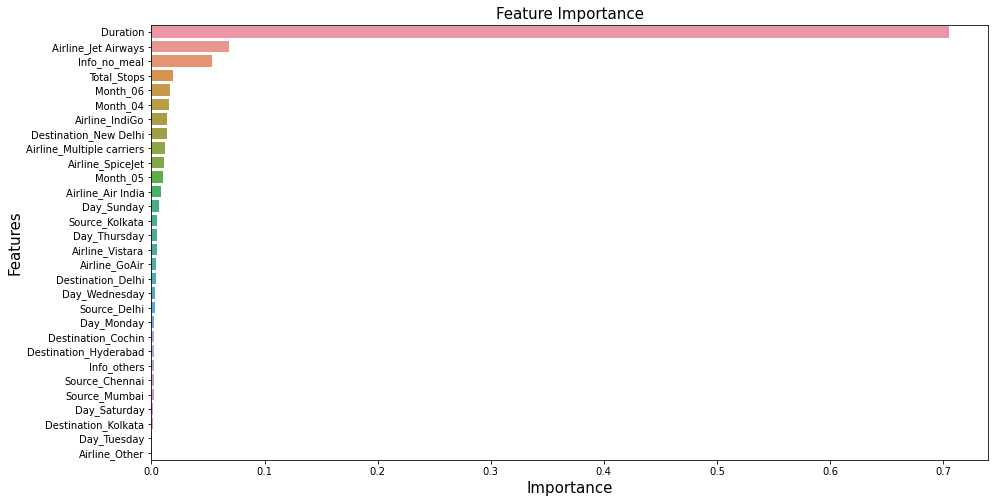

In [144]:
plt.rcParams['figure.figsize'] = [15,8]
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

## `Time For Prediction `

In [145]:
test.head()

,Airline,Source,Destination,Duration,Total_Stops,Month,Day,Info
0,Jet Airways,Delhi,Cochin,10.916667,1,06,Thursday,no_info
1,IndiGo,Kolkata,Banglore,4.000000,1,05,Sunday,no_info
2,Jet Airways,Delhi,Cochin,23.750000,1,05,Tuesday,no_meal
3,Multiple carriers,Delhi,Cochin,13.000000,1,05,Tuesday,no_info
4,Air Asia,Banglore,Delhi,2.833333,0,06,Monday,no_info


In [130]:
cat_test=test.select_dtypes(exclude='number')

In [131]:
cat_test.columns

Index(['Airline', 'Source', 'Destination', 'Month', 'Day', 'Info'], dtype='object')

In [132]:
num_test=df_wto.select_dtypes(include='number')

In [133]:
num_test.columns

Index(['Duration', 'Total_Stops', 'Price'], dtype='object')

In [134]:
test_en=pd.get_dummies(data=test , columns = cat_test.columns , drop_first=True )
test_en.head(5)

,Duration,Total_Stops,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Month_04,Month_05,Month_06,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Info_no_meal,Info_others
0,10.916667,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,4.000000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,23.750000,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,13.000000,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,2.833333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [135]:
#Prediction Train
predicted_price=automl.model.predict(test_en)

In [136]:
test_en['Price']=np.exp(predicted_price)

In [137]:
test_en['Price'].head()

0    14414.760732
1     8993.174890
2    12970.397344
3    10867.123934
4     7950.385954
Name: Price, dtype: float64